# Logistic Regression (Preloaded Dataset)
scikit-learn comes with a few small datasets that do not require to download any file from some external website. The digits dataset we will use is one of these small standard datasets. These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit. They are however often too small to be representative of real world machine learning tasks. After learning the basics of logisitic regression, we will use the MNIST Handwritten digit database

Each datapoint is a 8x8 image of a digit.

Parameters:Number;
Classes:10;
Samples per class: ~180
Samples total:1797
Dimensionality:64
Features:integers 0-16

In [1]:
## importing the necessary libraries
import numpy as np 

import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
#digits
#digits.data
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

# Showing the Images and Labels

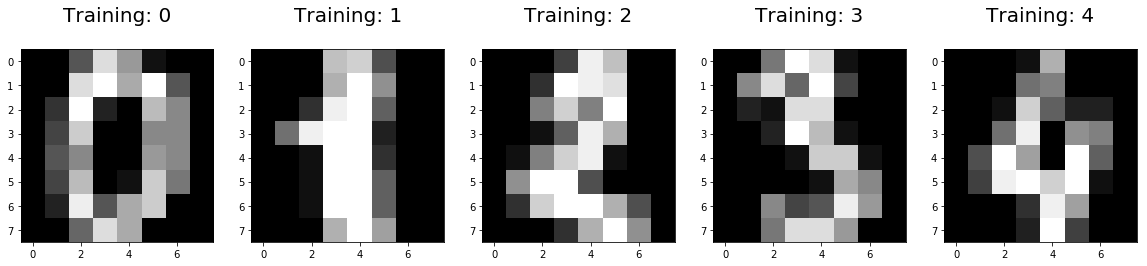

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Splitting Data into Training and Test Sets

In [9]:
# test_size: what proportion of original data is used for test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [10]:
print(x_train.shape)

(1347, 64)


In [11]:
print(y_train.shape)

(1347,)


In [12]:
print(x_test.shape)

(450, 64)


In [13]:
print(y_test.shape)

(450,)


# 4-Step Modeling Pattern
Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [14]:
from sklearn.linear_model import LogisticRegression

Step 2: Make an instance of the Model

In [15]:
logisticRegr = LogisticRegression()

In [ ]:
#logisticRegr

Step 3: Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [16]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Step 4: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [17]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [18]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Predict data from our trained model

In [19]:
print("\n corresponding real values")
y_test[0:10]


 corresponding real values


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [20]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [21]:
predictions.shape

(450,)

# Measuring Model Performance
accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [22]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


# Confusion Matrix (Digits Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes.
# Confusion Matrix (Seaborn)
Note: Seaborn needs to be installed for this portion

In [ ]:
# !conda install seaborn -y

In [23]:
import numpy as np 

import seaborn as sns
from sklearn import metrics

In [24]:
# Make predictions on test data
predictions = logisticRegr.predict(x_test)

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

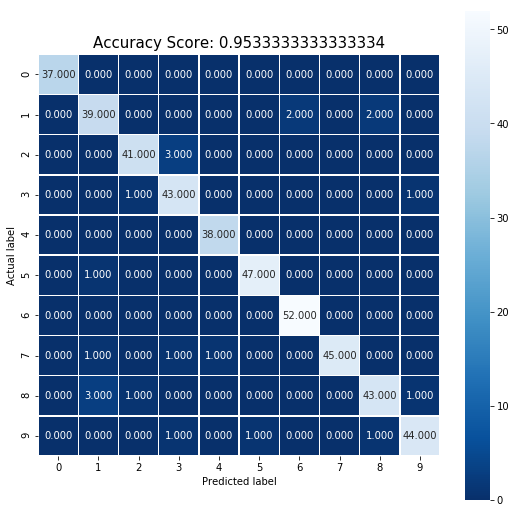

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Display Misclassified images with Predicted Labels

In [30]:
%matplotlib inline
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

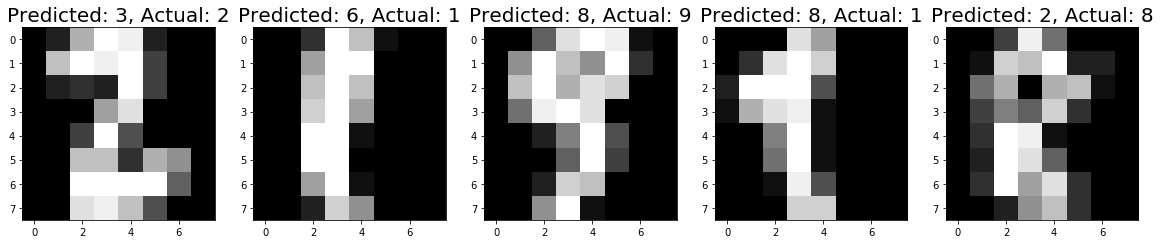

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1,5 , plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)